In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('salary.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


In [23]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,216500.000000
std,3.02765,285054.088435
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,215000.000000
max,10.00000,1000000.000000


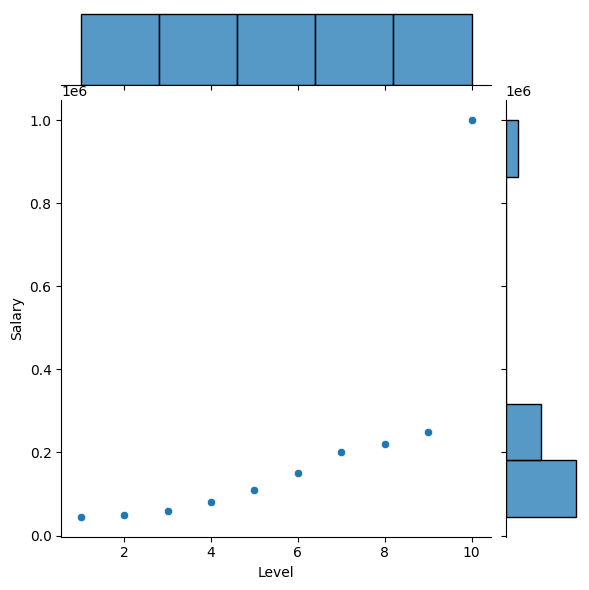

In [24]:
sns.jointplot(x = 'Level', y = 'Salary', data = data)

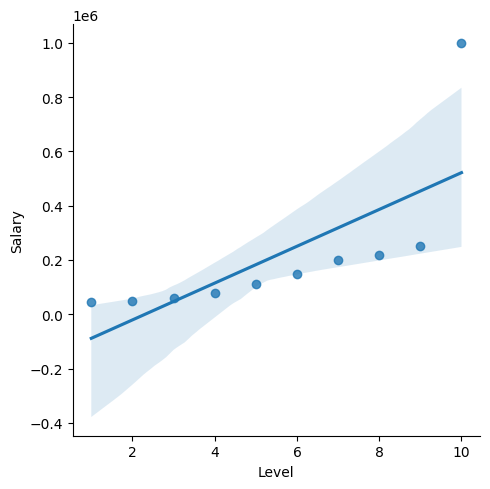

In [25]:
sns.lmplot(x = 'Level', y = 'Salary', data= data)

In [26]:
x = data[['Level']]

In [27]:
y = data['Salary']

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [59]:
polyregressor = PolynomialFeatures(degree = 5)

In [60]:
x_cols = polyregressor.fit_transform(x)

In [61]:
x_cols

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [62]:
regressor = LinearRegression()

In [63]:
regressor.fit(x_cols, y)

LinearRegression()

In [64]:
print('Poly Coeff', regressor.coef_)

Poly Coeff [ 0.00000000e+00  8.52186480e+05 -5.03851981e+05  1.28709207e+05
 -1.45046620e+04  5.96153846e+02]


In [65]:
y_pred = regressor.predict(polyregressor.fit_transform(x))

In [66]:
y_pred

array([ 36468.53147363,  78974.35897812,  40361.3053635 ,  55104.89510584,
       124184.14918428, 186620.04661965, 191013.98601302, 167086.24708436,
       297214.45221106, 987972.02796658])

Text(0, 0.5, 'Salary')

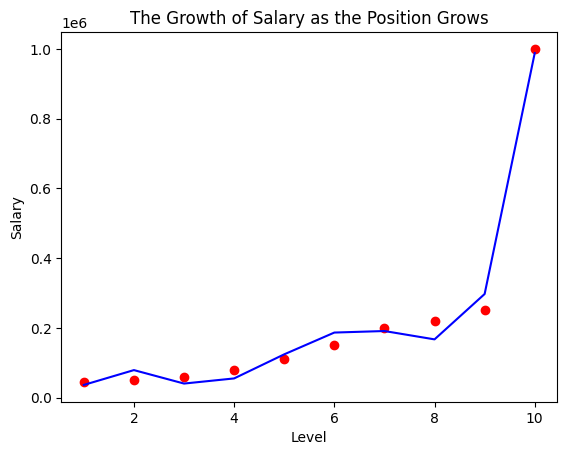

In [58]:
plt.scatter(x,y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('The Growth of Salary as the Position Grows')
plt.xlabel('Level')
plt.ylabel('Salary')



In [68]:
# if my position was higher than the CEO (maybe the owner)
x = [[11]]
y_pred = regressor.predict(polyregressor.fit_transform(x))
y_pred


array([2941666.66665902])

The expected salary of the owner would be nearly $2.9 million 